In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [118]:
# Load the dataset (assuming 'house_price_dataset.csv' is the dataset file)
train = pd.read_csv('train.csv')


In [119]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [120]:

# Preprocess the data (handle missing values, encoding, feature selection, etc.)

# Assuming 'X' contains the features and 'y' contains the target variable 'SalePrice'
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']


In [121]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [122]:
print('The features is \n', train.columns)

The features is 
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'Garage

In [123]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [124]:
# Brief Statistics of the SalePrice
pd.DataFrame(train['SalePrice'].describe())

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


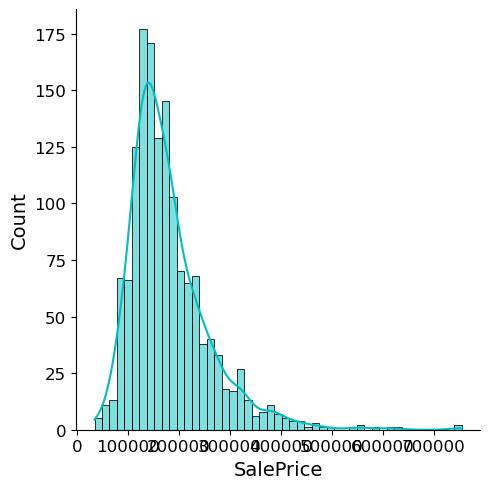

In [125]:
#Drawing Plots
sns.displot(train['SalePrice'], kde= True, fill = True, color = 'c');

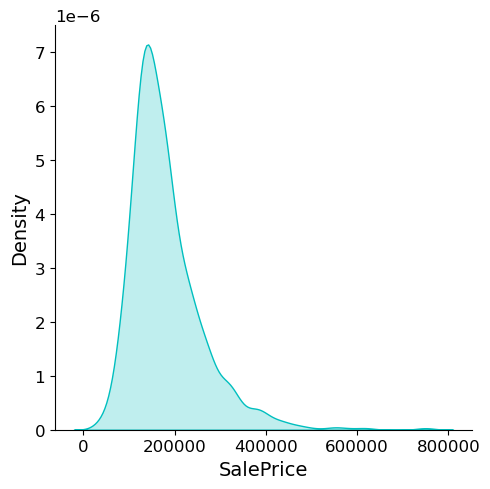

In [126]:
#More Suitable Plot
sns.displot(train['SalePrice'], kind='kde',fill = True, color = 'c');

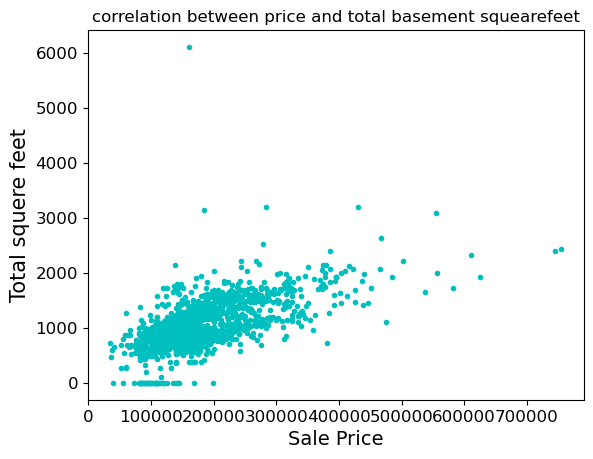

In [127]:
# Checking if any co-relation between SalePrice and Total Square Feet of Basement Area

plt.plot(train['SalePrice'],train['TotalBsmtSF'],'c.')
plt.xlabel('Sale Price', fontsize=14)
plt.ylabel('Total squere feet' ,fontsize=15)
plt.title('correlation between price and total basement squearefeet',)
plt.show;

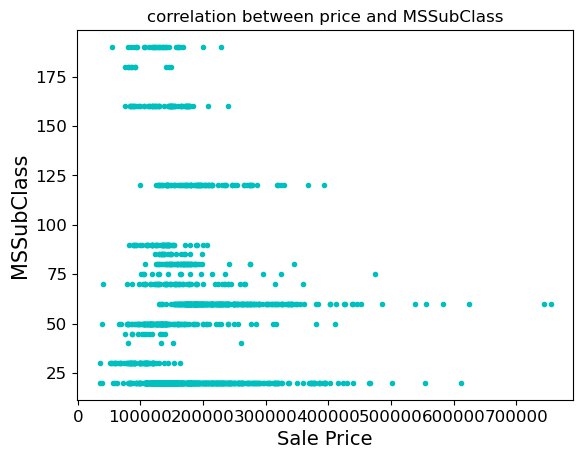

In [128]:
# # Checking if any co-relation between SalePrice and MSSubClass

plt.plot(train['SalePrice'],train['MSSubClass'],'c.')
plt.xlabel('Sale Price', fontsize=14)
plt.ylabel('MSSubClass' ,fontsize=15)
plt.title('correlation between price and MSSubClass',)
plt.show;

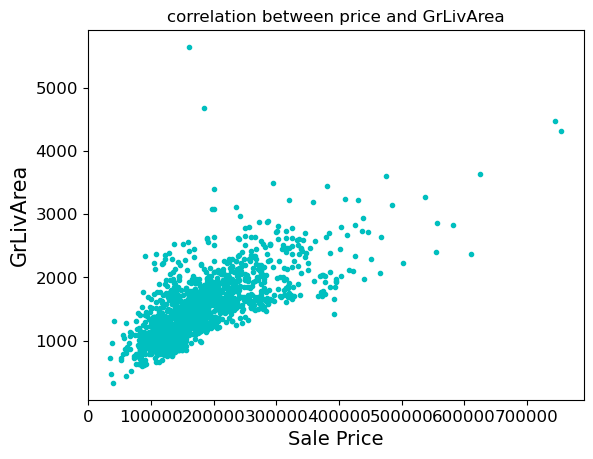

In [129]:
plt.plot(train['SalePrice'],train['GrLivArea'],'c.')
plt.xlabel('Sale Price', fontsize=14)
plt.ylabel('GrLivArea' ,fontsize=15)
plt.title('correlation between price and GrLivArea',)
plt.show;

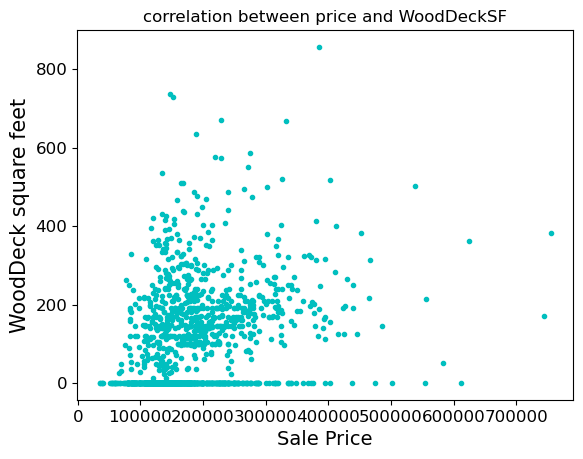

In [130]:
plt.plot(train['SalePrice'],train['WoodDeckSF'],'c.')
plt.xlabel('Sale Price', fontsize=14)
plt.ylabel('WoodDeck square feet' ,fontsize=15)
plt.title('correlation between price and WoodDeckSF',)
plt.show;

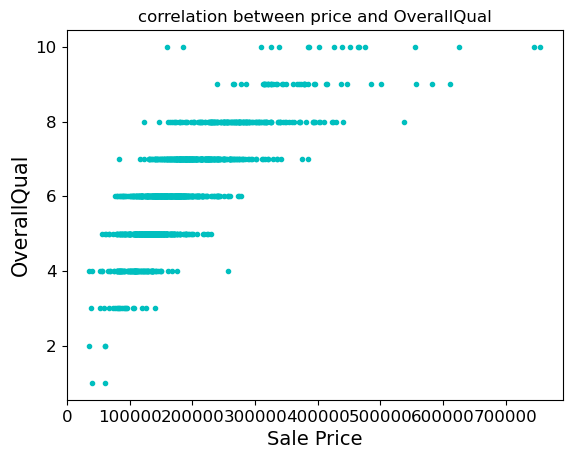

In [131]:
plt.plot(train['SalePrice'],train['OverallQual'],'c.')
plt.xlabel('Sale Price', fontsize=14)
plt.ylabel('OverallQual' ,fontsize=15)
plt.title('correlation between price and OverallQual',)
plt.show;


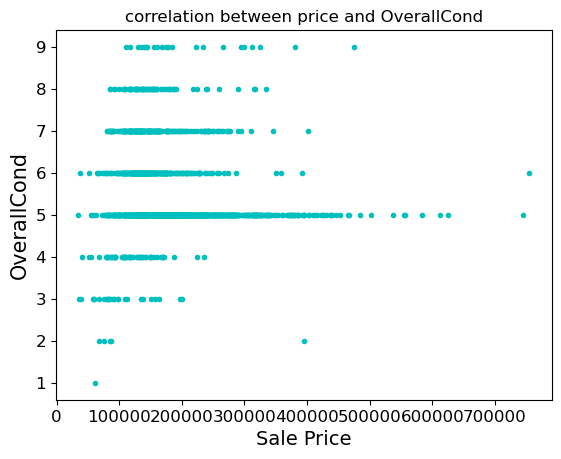

In [132]:
plt.plot(train['SalePrice'],train['OverallCond'],'c.')
plt.xlabel('Sale Price', fontsize=14)
plt.ylabel('OverallCond' ,fontsize=15)
plt.title('correlation between price and OverallCond',)
plt.show;

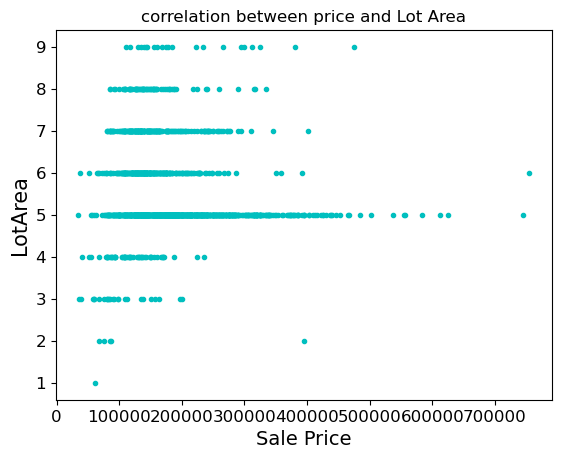

In [133]:
plt.plot(train['SalePrice'],train['OverallCond'],'c.')
plt.xlabel('Sale Price', fontsize=14)
plt.ylabel('LotArea' ,fontsize=15)
plt.title('correlation between price and Lot Area',)
plt.show;

In [134]:
# For plotting figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

<Axes: >

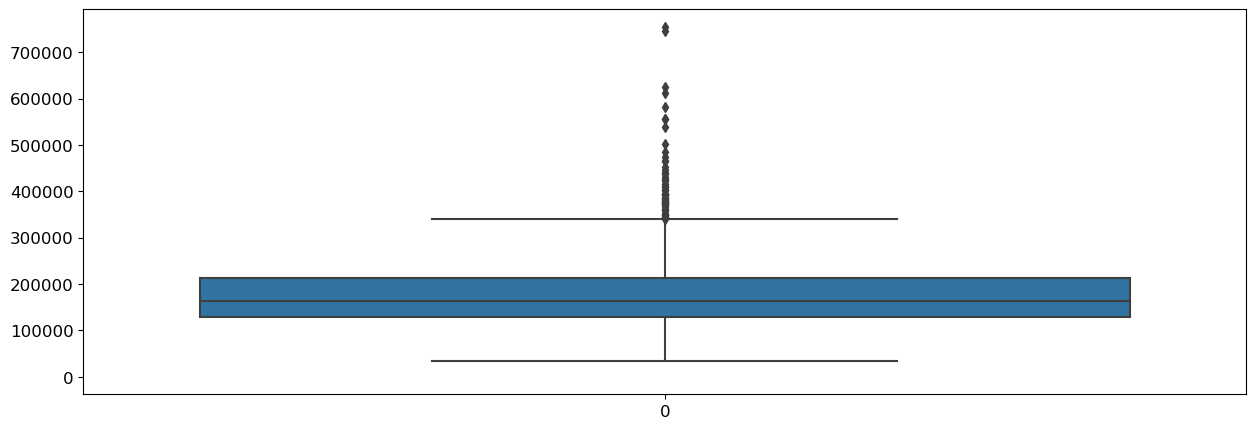

In [135]:
plt.figure(figsize=(15,5))
plt.plot(1,2,1)
sns.boxplot(train.SalePrice)

<Axes: >

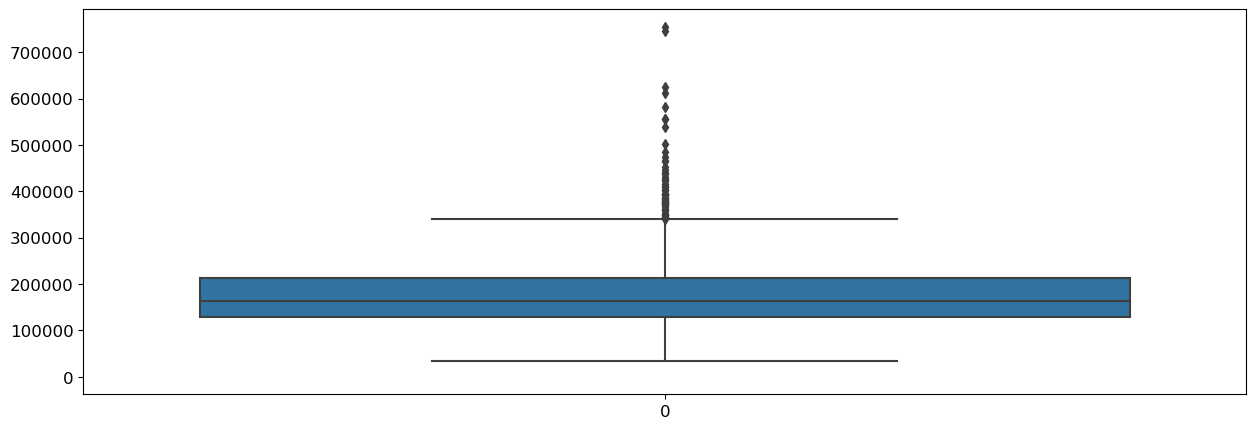

In [136]:
plt.figure(figsize=(15,5))
plt.plot(1,2,1)
sns.boxplot(train.SalePrice)

<Axes: >

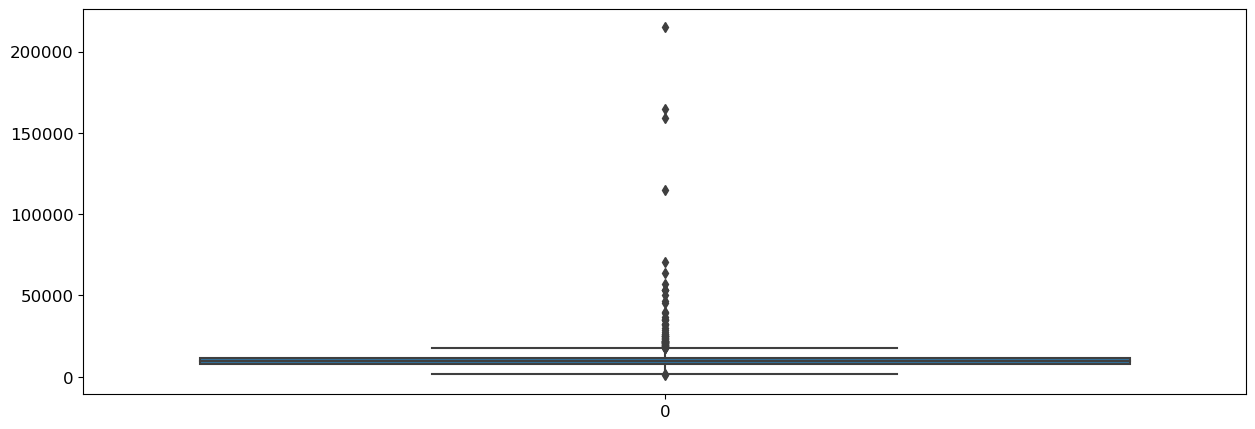

In [137]:
plt.figure(figsize=(15,5))
plt.plot(1,2,1)
sns.boxplot(train.LotArea)

In [138]:
# drop SalePrice and id
df=train
df.drop(['SalePrice', 'Id'], axis = 1 , inplace = True)
print('shape of all the data is ==>', df.shape)
df.head(2)

shape of all the data is ==> (1460, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [139]:
print(df['MSSubClass'].head(5))

0    60
1    20
2    60
3    70
4    60
Name: MSSubClass, dtype: int64


In [140]:
#MSSubClass is a categorical class recoded with number we need to convert it to categorical

print('Making MSSubClass Categorial....')
df['MSSubClass'] = df['MSSubClass'].astype(str) + 'c'

print(df['MSSubClass'].head(5))

Making MSSubClass Categorial....
0    60c
1    20c
2    60c
3    70c
4    60c
Name: MSSubClass, dtype: object


In [141]:
def check_missing(data, in_out, dtype = 'object'):
    if in_out == 'include' : 
        nulls = data.select_dtypes(include = dtype)
    else:
        nulls = data.select_dtypes(exclude = dtype)
    
    nulls = nulls.isnull().sum()
    nulls = nulls.drop(nulls[nulls == 0].index).sort_values(ascending=False)
    print('Checking missing data')
    return pd.DataFrame(nulls)


In [142]:
print('missing categorical featuers')

#for categorial
check_missing(df, 'include', 'object')
print('\n')

missing categorical featuers
Checking missing data




In [143]:
print('missing numerical featuers')
#for numerical
check_missing(df, 'exclude', 'object')

missing numerical featuers
Checking missing data


,0
LotFrontage,259
GarageYrBlt,81
MasVnrArea,8


In [144]:
not_missing = ['PoolQC', 'MiscFeature', 'Alley', 'Fence' ,'FireplaceQu',
              'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
              'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 
              'BsmtFinType1', 'MasVnrType', 'MSZoning','Utilities',
            'Functional','Exterior1st','Exterior2nd','KitchenQual',
               'SaleType', 'Electrical'
         ]

In [145]:
for feature in not_missing:
    df[feature] = df[feature].fillna(value = 'None')

In [146]:
print('now missing categorical features is')
check_missing(df,'include')

now missing categorical features is
Checking missing data


,0


In [147]:
df = pd.get_dummies(df)
print('after get dummies shape of the data is \n', df.shape)

after get dummies shape of the data is 
 (1460, 317)


In [148]:
# Revisit Numerical Missing Values

print('Numerical missing data ')
check_missing(df, 'exclude')

Numerical missing data 
Checking missing data


,0
LotFrontage,259
GarageYrBlt,81
MasVnrArea,8


In [149]:
# Replacing the missing numerical with mean by simple imputer

from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer()
imputed_data = pd.DataFrame(my_imputer.fit_transform(df))
print('Imputation Complete')

Imputation Complete


In [150]:
#Recheck

print(check_missing(imputed_data, 'exclude')) # exclude object
print('\n')
print(check_missing(imputed_data, 'include')) # include object

Checking missing data
Empty DataFrame
Columns: [0]
Index: []


Checking missing data
Empty DataFrame
Columns: [0]
Index: []


In [151]:
#Separating the pre-processed train.csv


X_shape = train.shape[0]
train = imputed_data[:X_shape]
test  = imputed_data[X_shape:] #This is to be used at the end of the code for predicting SalePrice for test.csv

print('train shape is ==>', train.shape)

print('test(for test.csv) shape is ==>', test.shape)

train shape is ==> (1460, 317)
test(for test.csv) shape is ==> (0, 317)


In [152]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 

#Spliting the data from train.csv into train-validation sets
X_train, X_valid, y_train, y_valid = train_test_split(train,y, test_size = 0.20)
print('Splitted into 80|20')
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)

print('X_validation:', X_valid.shape)
print('y_validation:', y_valid.shape)

Splitted into 80|20
X_train: (1168, 317)
y_train: (1168,)
X_validation: (292, 317)
y_validation: (292,)


In [153]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# dictionary for comparing models
models_R2_score={} 
models_MAE_scores={}
models_RMSE_scores={}


#definition of model
def my_model(model, X_train = X_train, X_validation = X_valid,
            y_trains = y_train, y_validation = y_valid):
    
    #training model
    model.fit(X_train, y_trains)
    
    #making prediction
    y_pred = model.predict(X_validation)
    
    #calculating mean square error
    mse = mean_squared_error(y_validation, y_pred)
    
    #calculating root mean square error
    rmse = (np.sqrt(mean_squared_error(y_validation, y_pred)))
    
    #calculating r2 score
    r2 = r2_score(y_validation, y_pred)
    
    #calculating mean absolute error
    MAE = mean_absolute_error(y_validation, y_pred)

    print(f'The {model} performance for testing set')
    print("--------------------------------------")
    
    print('Mean Absolute Error score is ', MAE)
    print('Mean Square Error is {}'.format(mse))
    print('Root Mean Square Error is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    
    #updating the dictionary for futher comparison
    models_R2_score[model] =r2
    models_MAE_scores[model]=MAE
    models_RMSE_scores[model] = rmse
    

In [154]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
my_model(lin_reg)

The LinearRegression() performance for testing set
--------------------------------------
Mean Absolute Error score is  18566.567630393954
Mean Square Error is 846857031.9268652
Root Mean Square Error is 29100.808097488723
R2 score is 0.8582031499414438


In [155]:
from sklearn import linear_model
ridge = linear_model.RidgeCV(alphas=(range(1,200)))
my_model(ridge)
print('best aaccurate alpha = ', ridge.alpha_)

The RidgeCV(alphas=range(1, 200)) performance for testing set
--------------------------------------
Mean Absolute Error score is  17548.531808442003
Mean Square Error is 838334491.3947989
Root Mean Square Error is 28954.00648260615
R2 score is 0.8596301551576533
best aaccurate alpha =  9


In [156]:
#Lasso Model
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 200)

my_model(lasso)

The Lasso(alpha=200) performance for testing set
--------------------------------------
Mean Absolute Error score is  16249.410605254283
Mean Square Error is 726202343.8310828
Root Mean Square Error is 26948.14175098318
R2 score is 0.8784054439199828


In [157]:
#Elastic Net

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.5, l1_ratio =0.5)
my_model(elastic_net)


The ElasticNet(alpha=0.5) performance for testing set
--------------------------------------
Mean Absolute Error score is  17993.850762790313
Mean Square Error is 881974458.7515501
Root Mean Square Error is 29698.054797436653
R2 score is 0.8523231249570941


/Users/mdsahidulislam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.425e+11, tolerance: 7.461e+08
  model = cd_fast.enet_coordinate_descent(


In [158]:
print(models_R2_score)

{LinearRegression(): 0.8582031499414438, RidgeCV(alphas=range(1, 200)): 0.8596301551576533, Lasso(alpha=200): 0.8784054439199828, ElasticNet(alpha=0.5): 0.8523231249570941}


In [159]:
max_r2=None
max_r2_model=None

for key, val in models_R2_score.items():
    if max_r2 is None or val>max_r2:
        max_r2= val
        max_r2_model = key
print('Based on R2 Score:')
print(f'Best Model is {max_r2_model} and corresponding R2 Score is {max_r2}')
print('-----------------------')
#x= max(models_R2_score, key=models_R2_score.get)
#print(x)
        

Based on R2 Score:
Best Model is Lasso(alpha=200) and corresponding R2 Score is 0.8784054439199828
-----------------------
